In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /jobfs/128949831.gadi-pbs/matplotlib-4bct48zo because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts'))
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts', 'src'))

# With Local

In [4]:
DECENT_PATH = '/g/data/w40/ab2313/time_of_emergence/decent'

In [7]:
decent_ensembles = os.listdir(DECENT_PATH)
decent_ensembles

['DCENT_ensemble_1850_2023_member_004.nc',
 'DCENT_ensemble_1850_2023_member_009.nc',
 'DCENT_ensemble_1850_2023_member_007.nc',
 'DCENT_ensemble_1850_2023_member_002.nc',
 'DCENT_ensemble_1850_2023_member_003.nc',
 'DCENT_ensemble_1850_2023_member_005.nc',
 'DCENT_ensemble_1850_2023_member_008.nc',
 'DCENT_ensemble_1850_2023_member_006.nc',
 'DCENT_ensemble_1850_2023_member_001.nc',
 'DCENT_ensemble_1850_2023_member_010.nc']

In [8]:
data_e1 = xr.open_dataset(os.path.join(DECENT_PATH, decent_ensembles[0]))

In [9]:
data_e1

<xarray.Dataset> Size: 65MB
Dimensions:      (lon: 72, lat: 36, time: 2088)
Coordinates:
  * lon          (lon) float32 288B 2.5 7.5 12.5 17.5 ... 347.5 352.5 357.5
  * lat          (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * time         (time) datetime64[ns] 17kB 1850-01-16 1850-02-14 ... 2023-12-16
Data variables:
    sst          (time, lat, lon) float32 22MB ...
    lsat         (time, lat, lon) float32 22MB ...
    temperature  (time, lat, lon) float32 22MB ...
Attributes:
    Conventions:  CF-1.11
    title:        Native Format Dynamically Consistent Ensemble of Temperatur...
    history:      18-Jul-2024 22:50:32
    institution:  University of Southampton - Harvard University - Woods Hole...
    comment:      This file contains DCENT anomaly field at monthly 5x5 degre...
    references:   Chan, D., Gebbie, G., Huybers, P. & Kent, E. C. DCENT: Dyna...

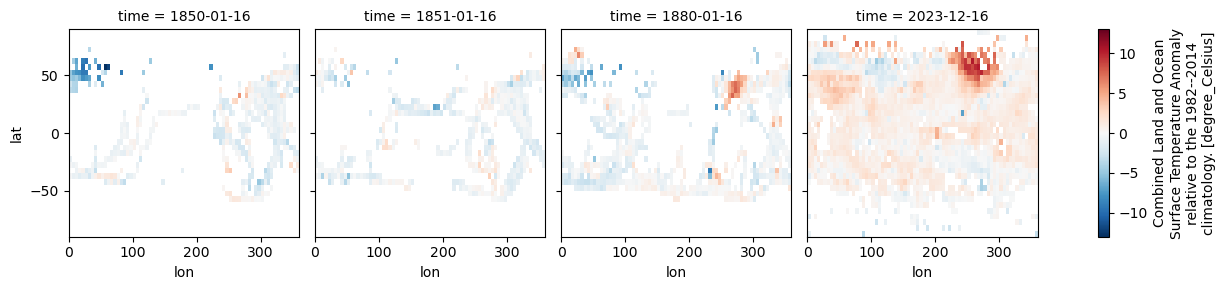

In [14]:
data_e1.isel(time=[0, 12, 30*12, -1]).temperature.plot(col='time')

# With GCSFS

In [3]:
import gcsfs

In [4]:
gcs = gcsfs.GCSFileSystem()

In [15]:

def read_dcent_google_cloud(en):
    """
    if en is 0:  read ensemble mean
    if en is 1-200: read individual members
    if en is -1: read climatology
    """

    if en == 0:
        store_value  = 'gs://dcent_dynamically_consistent_ensemble_of_temperature/DCENT_zarr/DCENT_ensemble_1850_2023_ensemble_mean.zarr/'
    elif en == -1:
        store_value  = 'gs://dcent_dynamically_consistent_ensemble_of_temperature/DCENT_zarr/DCENT_monthly_climatology_1982_2014.zarr/'
    else:
        store_value0 = 'gs://dcent_dynamically_consistent_ensemble_of_temperature/DCENT_zarr/DCENT_ensemble_zarr/DCENT_ensemble_1850_2023_member_{:03d}.zarr/'
        store_value  = store_value0.format(en)
            
    mapper = gcs.get_mapper(store_value)
    ds = xr.open_zarr(mapper, consolidated=True)
    return ds

In [16]:
# ------------------------ Let's start from the ensemble mean ------------------------
en = 3         
ds = read_dcent_google_cloud(en)   

In [17]:
ds

<xarray.Dataset> Size: 65MB
Dimensions:      (lat: 36, lon: 72, time: 2088)
Coordinates:
  * lat          (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * lon          (lon) float32 288B 2.5 7.5 12.5 17.5 ... 347.5 352.5 357.5
  * time         (time) datetime64[ns] 17kB 1850-01-16T00:00:00.082397461 ......
Data variables:
    lsat         (time, lat, lon) float32 22MB dask.array<chunksize=(522, 9, 36), meta=np.ndarray>
    sst          (time, lat, lon) float32 22MB dask.array<chunksize=(522, 9, 36), meta=np.ndarray>
    temperature  (time, lat, lon) float32 22MB dask.array<chunksize=(522, 9, 36), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.11
    comment:      This file contains DCENT anomaly field at monthly 5x5 degre...
    history:      18-Jul-2024 22:50:31
    institution:  University of Southampton - Harvard University - Woods Hole...
    references:   Chan, D., Gebbie, G., Huybers, P. & Kent, E. C. DCENT: Dyna...
    title:        Native Format Dynamically Consistent Ensemble of Temperatur...

In [18]:
ds.temperature.

<xarray.DataArray 'temperature' (time: 2088, lat: 36, lon: 72)> Size: 22MB
dask.array<open_dataset-temperature, shape=(2088, 36, 72), dtype=float32, chunksize=(522, 9, 36), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * time     (time) datetime64[ns] 17kB 1850-01-16T00:00:00.082397461 ... 202...
Attributes:
    long_name:      Combined Land and Ocean Surface Temperature Anomaly relat...
    standard_name:  earth_surface_temperature_anomaly
    units:          degree_Celsius
    valid_max:      17.30246353149414
    valid_min:      -23.160526275634766

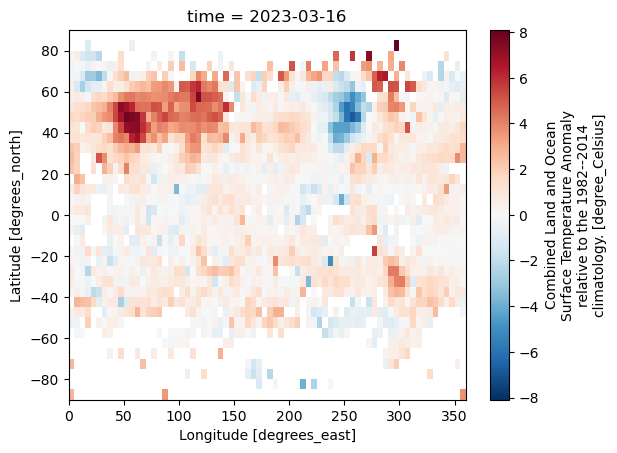

In [21]:
ds.isel(time=-10).temperature.plot()

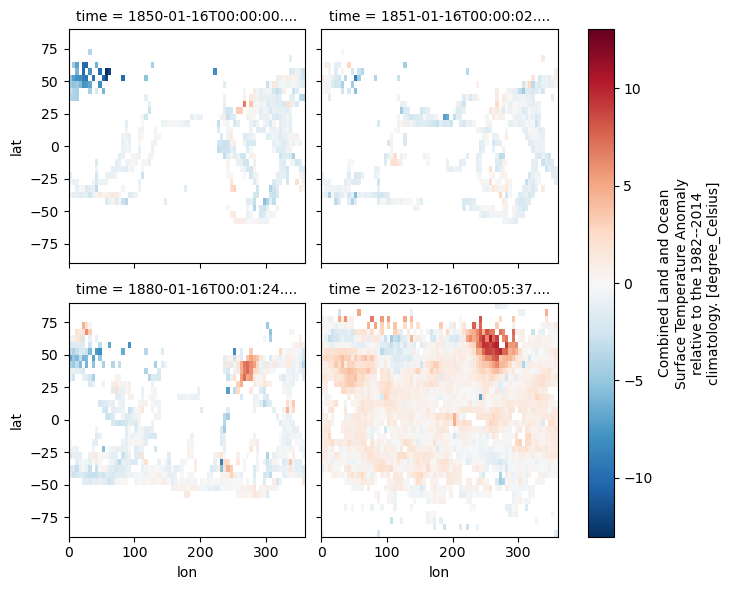

In [19]:
ds.isel(time=[0, 12, 30*12, -1]).temperature.plot(col='time', col_wrap=2)